In [2]:
# Import essential libraries for EDA
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud

# Enable inline plotting for Jupyter
%matplotlib inline


In [3]:
# Load the consolidated JSON dataset
data_path = "../data/processed/consolidated_data.json"  
# Load the JSON data
with open(data_path, "r", encoding="utf-8") as file:
    consolidated_data = json.load(file)

# Convert to a DataFrame for easier analysis
df = pd.DataFrame(consolidated_data)
df.head()


,title,url,cleaned_content,word_tokens,sentence_tokens
0,"Thinking of Otago?, Pacific at Otago | Univers...",https://www.otago.ac.nz/pacific-at-otago/prosp...,"Thinking of Otago?, Pacific at Otago | Univers...","[Thinking, of, Otago, ?, ,, Pacific, at, Otago...","[Thinking of Otago?, Pacific at Otago | Univer..."
1,"LGBTTIQA+ staff information, resources and eve...",https://www.otago.ac.nz/staff/rainbow,"LGBTTIQA+ staff information, resources and eve...","[LGBTTIQA+, staff, information, ,, resources, ...","[LGBTTIQA+ staff information, resources and ev..."
2,Welcome from the Vice-Chancellor | University ...,https://www.otago.ac.nz/about/welcome,Welcome from the Vice-Chancellor | University ...,"[Welcome, from, the, Vice, -, Chancellor, |, U...",[Welcome from the Vice-Chancellor | University...
3,"For current students, Pacific at Otago | Unive...",https://www.otago.ac.nz/pacific-at-otago/current,"For current students, Pacific at Otago | Unive...","[For, current, students, ,, Pacific, at, Otago...","[For current students, Pacific at Otago | Univ..."
4,"Policies, Pathway and English Language Centre ...",https://www.otago.ac.nz/uolcfy/about/policies,"Policies, Pathway and English Language Centre ...","[Policies, ,, Pathway, and, English, Language,...","[Policies, Pathway and English Language Centre..."


In [4]:
# Overview of the dataset
print("Dataset Overview:\n")
print(df.info())

# Basic statistics of the cleaned content
df['content_length'] = df['cleaned_content'].apply(len)
df['word_count'] = df['cleaned_content'].apply(lambda x: len(x.split()))

# Show descriptive statistics
df.describe()


Dataset Overview:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   title            177 non-null    object
 1   url              177 non-null    object
 2   cleaned_content  177 non-null    object
 3   word_tokens      177 non-null    object
 4   sentence_tokens  177 non-null    object
dtypes: object(5)
memory usage: 7.0+ KB
None


,content_length,word_count
count,177.000000,177.000000
mean,16573.853107,2302.661017
std,9217.981735,1257.584864
min,726.000000,120.000000
25%,13505.000000,1859.000000
50%,14472.000000,1994.000000
75%,16443.000000,2302.000000
max,118106.000000,15494.000000


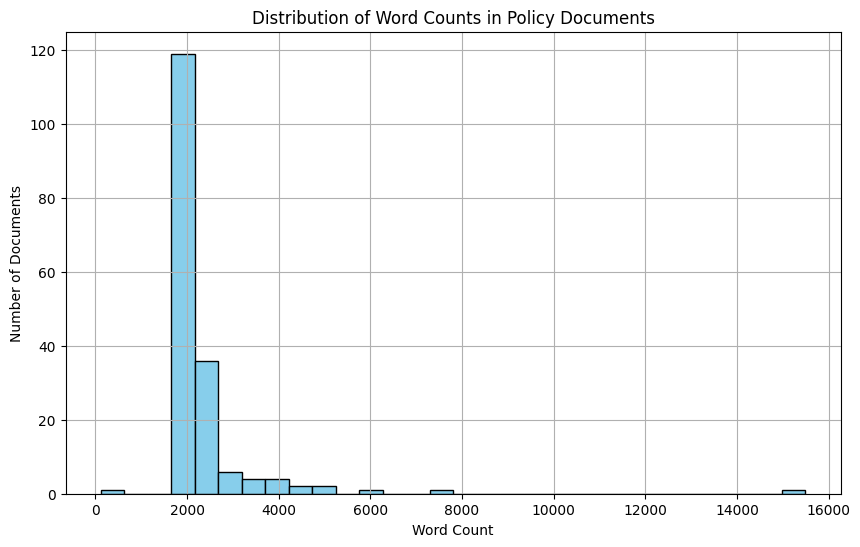

In [5]:
# Plot the distribution of word counts in policies
plt.figure(figsize=(10, 6))
plt.hist(df['word_count'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Word Counts in Policy Documents')
plt.xlabel('Word Count')
plt.ylabel('Number of Documents')
plt.grid(True)
plt.show()


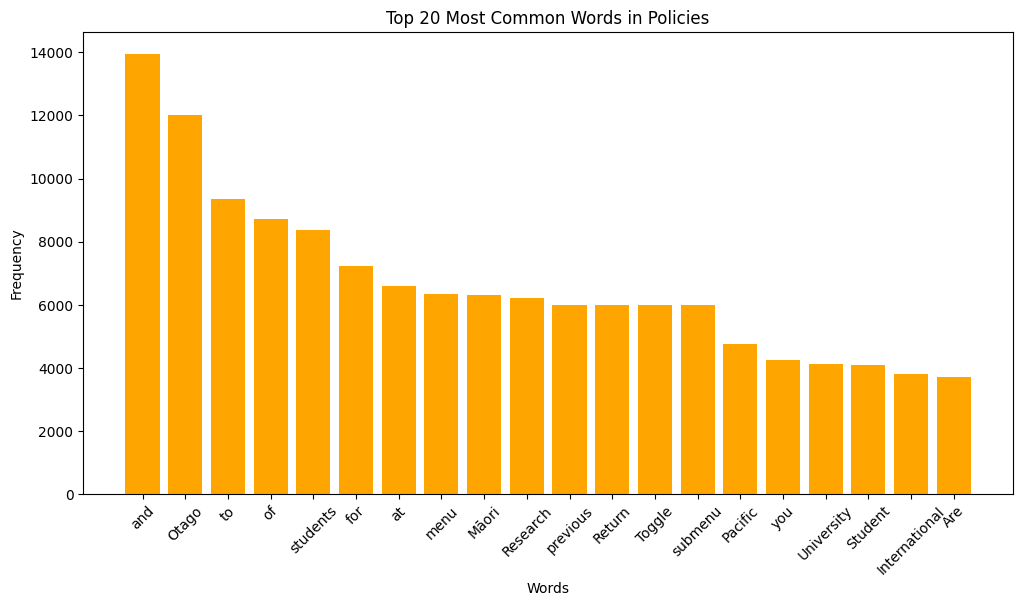

In [6]:
# Combine all text for frequency analysis
all_text = " ".join(df['cleaned_content'])

# Split into words and count frequencies
word_counts = Counter(all_text.split())

# Get the 20 most common words
common_words = word_counts.most_common(20)

# Convert to DataFrame for visualization
common_words_df = pd.DataFrame(common_words, columns=['Word', 'Frequency'])

# Plot the top 20 most common words
plt.figure(figsize=(12, 6))
plt.bar(common_words_df['Word'], common_words_df['Frequency'], color='orange')
plt.xticks(rotation=45)
plt.title('Top 20 Most Common Words in Policies')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()


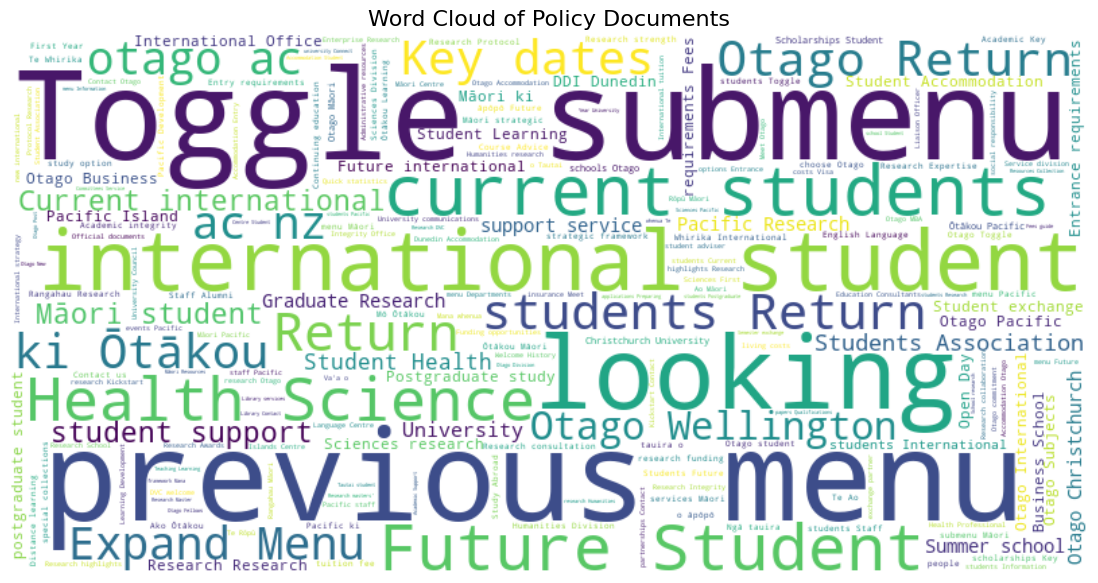

In [8]:
# Generate a word cloud to visualize the most frequent words
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Policy Documents", fontsize=16)
plt.show()


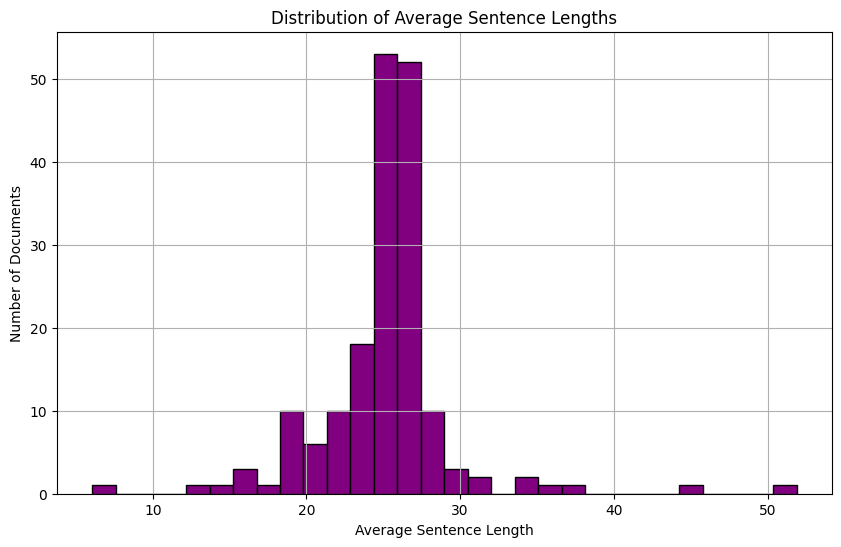

In [10]:
# Analyze average sentence length
df['avg_sentence_length'] = df['cleaned_content'].apply(lambda x: sum(len(sentence.split()) for sentence in x.split('.')) / max(len(x.split('.')), 1))

# Plot average sentence length
plt.figure(figsize=(10, 6))
plt.hist(df['avg_sentence_length'], bins=30, color='purple', edgecolor='black')
plt.title('Distribution of Average Sentence Lengths')
plt.xlabel('Average Sentence Length')
plt.ylabel('Number of Documents')
plt.grid(True)
plt.show()


In [12]:
# Display summary statistics for word and sentence analysis
df[['word_count', 'avg_sentence_length']].describe()



,word_count,avg_sentence_length
count,177.000000,177.000000
mean,2302.661017,25.175296
std,1257.584864,4.408928
min,120.000000,6.052442
25%,1859.000000,23.853333
50%,1994.000000,25.588889
75%,2302.000000,26.558824
max,15494.000000,51.894737


   ---------------------------------------- 0.0/2.1 MB ? eta -:--:--
   ---------------------------------------- 2.1/2.1 MB 28.7 MB/s eta 0:00:00


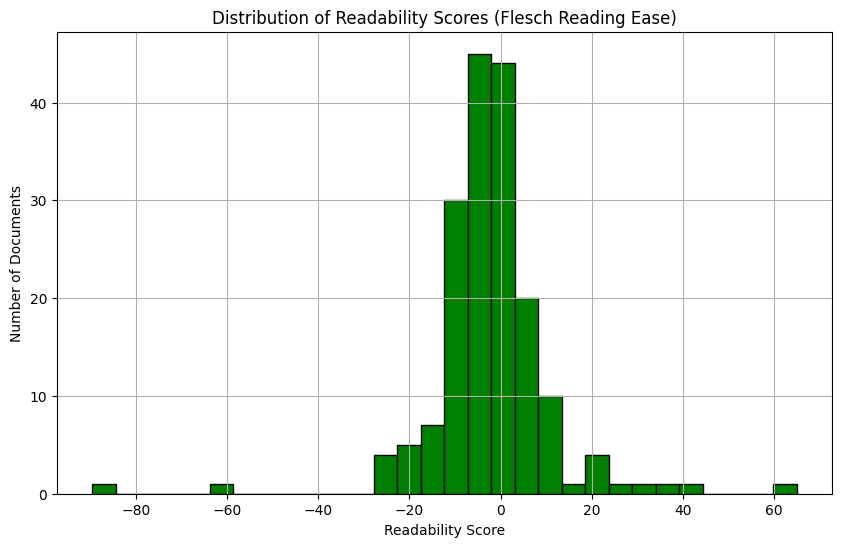

In [13]:
# Install textstat for readability analysis if not installed
!pip install textstat

import textstat

# Calculate the Flesch Reading Ease Score for each policy
df['readability_score'] = df['cleaned_content'].apply(lambda x: textstat.flesch_reading_ease(x))

# Plot readability scores
plt.figure(figsize=(10, 6))
plt.hist(df['readability_score'], bins=30, color='green', edgecolor='black')
plt.title('Distribution of Readability Scores (Flesch Reading Ease)')
plt.xlabel('Readability Score')
plt.ylabel('Number of Documents')
plt.grid(True)
plt.show()


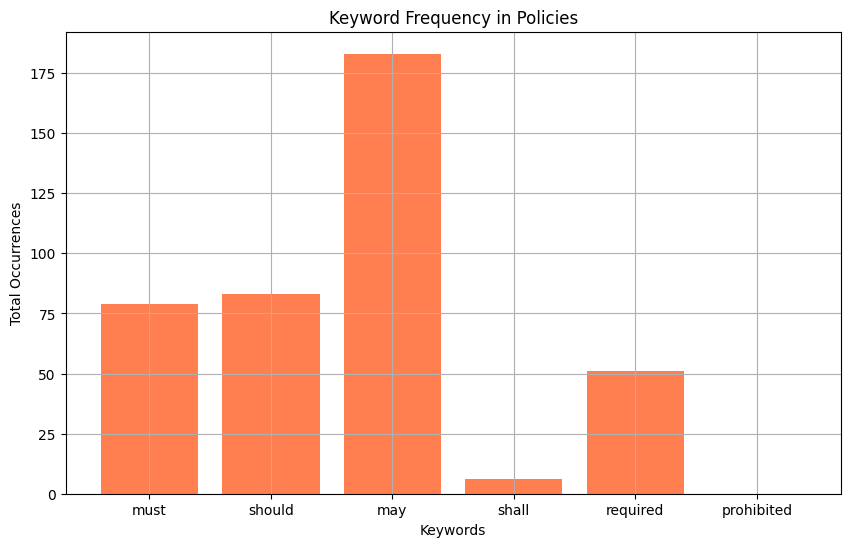

In [14]:
# Analyze how often key compliance words appear in policies
keywords = ["must", "should", "may", "shall", "required", "prohibited"]

# Count keyword occurrences in each document
for keyword in keywords:
    df[f'count_{keyword}'] = df['cleaned_content'].apply(lambda x: x.lower().split().count(keyword))

# Plot the frequency of keywords across all policies
keyword_totals = [df[f'count_{kw}'].sum() for kw in keywords]

plt.figure(figsize=(10, 6))
plt.bar(keywords, keyword_totals, color='coral')
plt.title('Keyword Frequency in Policies')
plt.xlabel('Keywords')
plt.ylabel('Total Occurrences')
plt.grid(True)
plt.show()


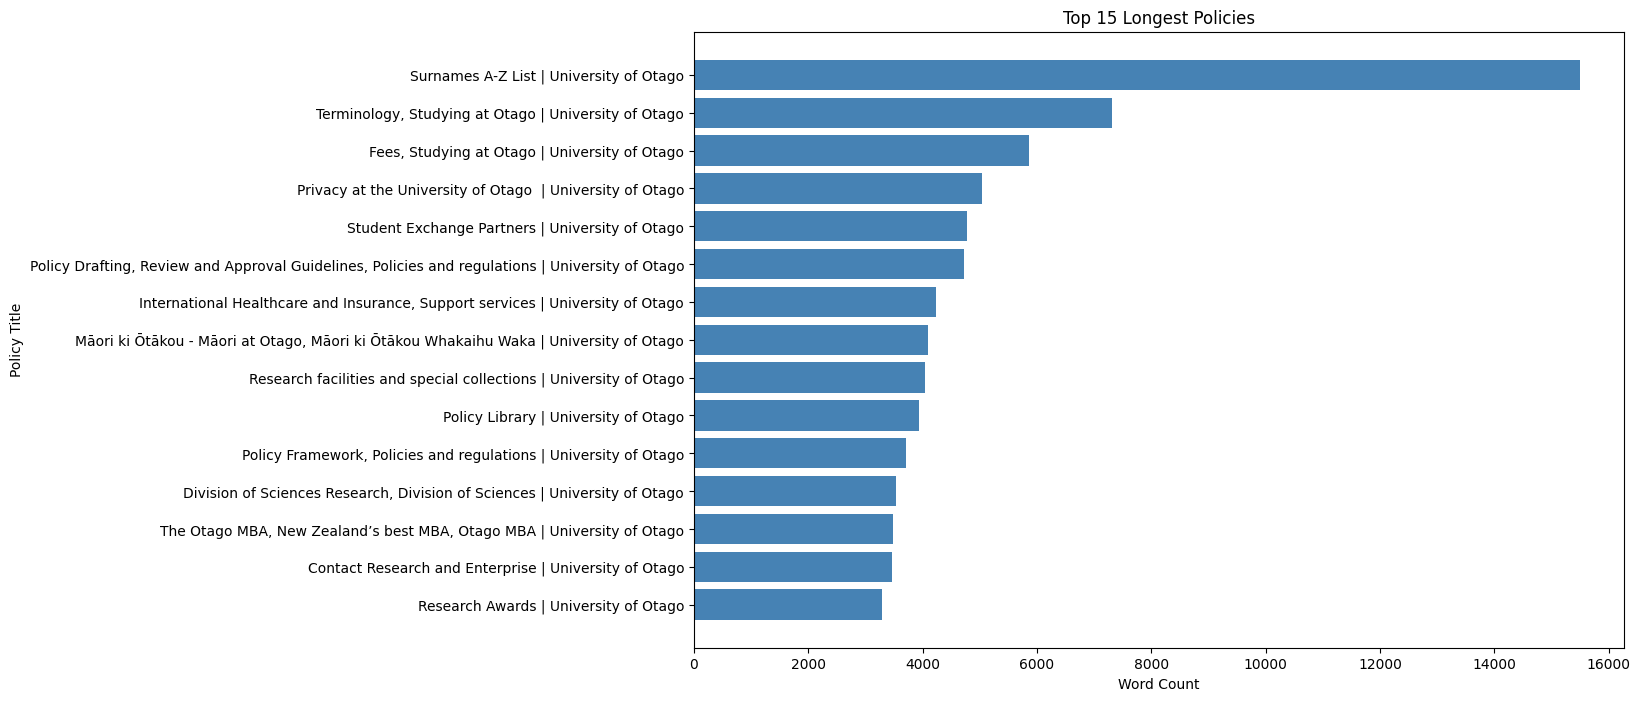

In [15]:
# Sort and plot the top 15 longest policies by word count
top_longest = df.sort_values(by='word_count', ascending=False).head(15)

plt.figure(figsize=(12, 8))
plt.barh(top_longest['title'], top_longest['word_count'], color='steelblue')
plt.xlabel('Word Count')
plt.ylabel('Policy Title')
plt.title('Top 15 Longest Policies')
plt.gca().invert_yaxis()  # Invert for better readability
plt.show()


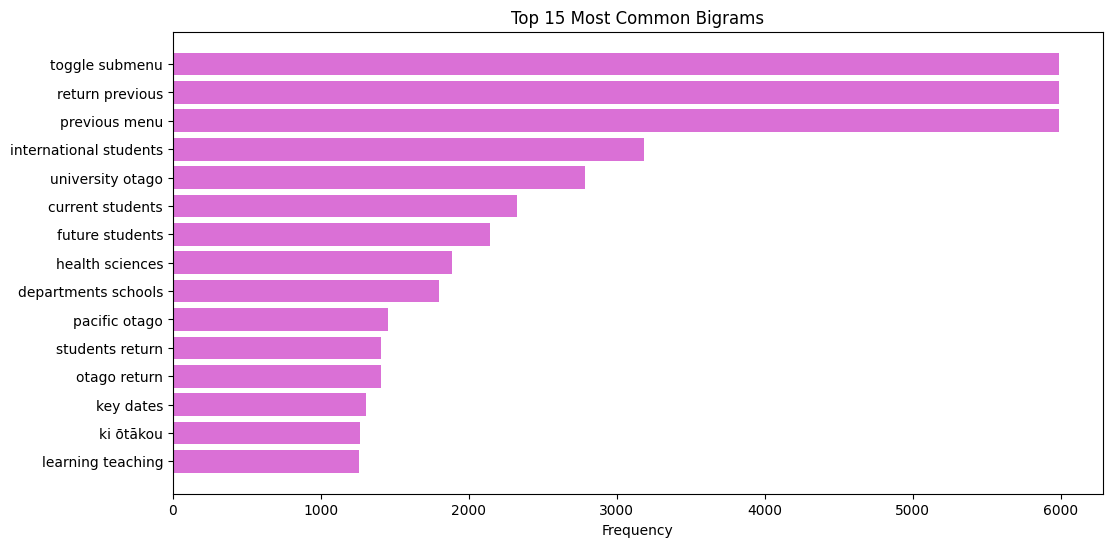

In [16]:
from sklearn.feature_extraction.text import CountVectorizer

# Function to generate n-grams
def get_top_n_grams(corpus, ngram_range=(2, 2), n=None):
    vec = CountVectorizer(ngram_range=ngram_range, stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

# Get top 15 bigrams
top_bigrams = get_top_n_grams(df['cleaned_content'], ngram_range=(2, 2), n=15)

# Convert to DataFrame for plotting
bigram_df = pd.DataFrame(top_bigrams, columns=['Bigram', 'Frequency'])

# Plot the top bigrams
plt.figure(figsize=(12, 6))
plt.barh(bigram_df['Bigram'], bigram_df['Frequency'], color='orchid')
plt.xlabel('Frequency')
plt.title('Top 15 Most Common Bigrams')
plt.gca().invert_yaxis()
plt.show()


In [18]:
# Check if 'category' or similar column exists
if 'category' in df.columns:
    category_counts = df['category'].value_counts()

    # Plot policy counts by category
    plt.figure(figsize=(10, 6))
    category_counts.plot(kind='bar', color='teal')
    plt.title('Policy Count by Category')
    plt.xlabel('Category')
    plt.ylabel('Number of Policies')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()
else:
    print("No 'category' column found in the dataset.")


No 'category' column found in the dataset.


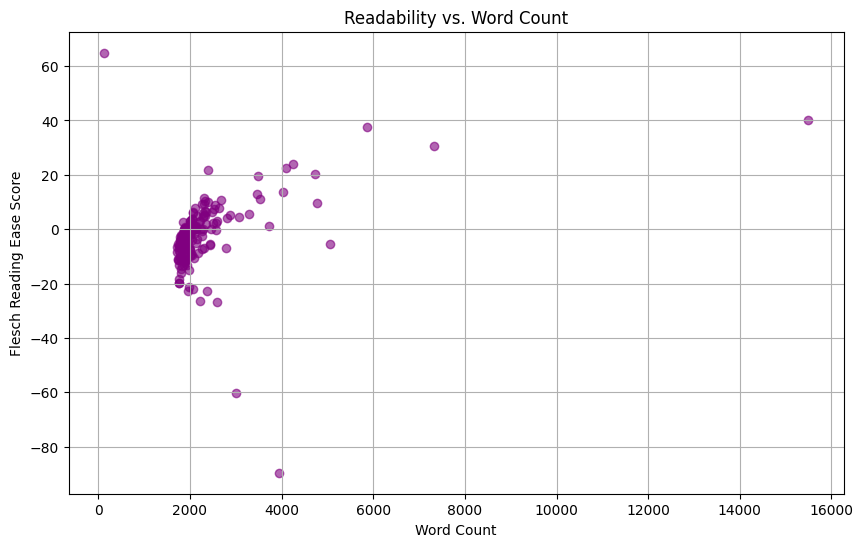

In [19]:
# Scatter plot to explore the relationship between readability and word count
plt.figure(figsize=(10, 6))
plt.scatter(df['word_count'], df['readability_score'], alpha=0.6, color='purple')
plt.title('Readability vs. Word Count')
plt.xlabel('Word Count')
plt.ylabel('Flesch Reading Ease Score')
plt.grid(True)
plt.show()


In [20]:
# Export the processed DataFrame for further analysis
export_path = "../output/processed_policy_data.csv"
df.to_csv(export_path, index=False)
print(f"✅ Processed data exported to {export_path}")


✅ Processed data exported to ../output/processed_policy_data.csv
